<a href="https://colab.research.google.com/github/Vigneshkumarcvk/Python/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.columns

Index(['Chirps_Second', 'Ground_Temperature'], dtype='object')

In [ ]:
df.isnull()

,Chirps_Second,Ground_Temperature
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
df.head()

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
iqr = df.Chirps_Second.quantile(0.75)-df.Chirps_Second.quantile(0.25)
upper_thershold = df.Chirps_Second.quantile(0.75)+1.5*iqr
lower_thershold = df.Chirps_Second.quantile(0.25)-1.5*iqr
upper_thershold,lower_thershold

(19.699999999999996, 12.9)

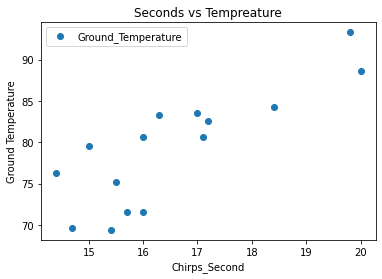

In [ ]:

df.plot(x='Chirps_Second', y='Ground_Temperature', style='o')
plt.title("Seconds vs Tempreature")
plt.xlabel("Chirps_Second")
plt.ylabel("Ground Temperature")
plt.show()

In [ ]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [ ]:
df.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [ ]:
x = df.loc[:, ['Chirps_Second']].values
y = df.loc[:, ['Ground_Temperature']].values

In [ ]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(x,y, test_size = 0.3)

In [ ]:
x_test

array([[15.4],
       [15.7],
       [19.8],
       [15.5],
       [16. ],
       [17.1],
       [14.4],
       [18.4],
       [17.2],
       [16. ]])

In [ ]:
x_train

array([[14.7],
       [17. ],
       [16.3],
       [20. ],
       [15. ]])

In [ ]:
x_train.shape,x_test.shape

((5, 1), (10, 1))

In [ ]:
y_test

array([[69.4],
       [71.6],
       [93.3],
       [75.2],
       [80.6],
       [80.6],
       [76.3],
       [84.3],
       [82.6],
       [71.6]])

In [ ]:
y_train

array([[69.7],
       [83.5],
       [83.3],
       [88.6],
       [79.6]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(regression.intercept_)

[34.90685206]


In [ ]:
print(regression.coef_)

[[2.7730812]]


In [ ]:
regression.predict([[18]])

array([[84.82231368]])

In [ ]:
y_pred = regression.predict(x_test)
y_pred

array([[77.61230256],
       [78.44422692],
       [89.81385984],
       [77.88961068],
       [79.27615128],
       [82.3265406 ],
       [74.83922136],
       [85.93154616],
       [82.60384872],
       [79.27615128]])

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

ValueError: ignored

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


R2- SCORE: 0.571809504405365


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df.isnull()

,Brain,Body
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
57,False,False
58,False,False
59,False,False
60,False,False


In [ ]:
df.shape

(62, 2)

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.Brain.quantile(0.75),df.Brain.quantile(0.25)

(48.2025, 0.6000000000000001)

In [ ]:
df.Body.quantile(0.75),df.Body.quantile(0.25)

(166.0, 4.25)

In [ ]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper_thershold = df.Brain.quantile(0.75) + 1.5*iqr
lower_thershold = df.Brain.quantile(0.25)-1.5*iqr
upper_thershold,lower_thershold

(119.60625, -70.80375000000001)

In [ ]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
upper_thershold = df.Body.quantile(0.75) + 1.5*iqr
lower_thershold = df.Body.quantile(0.25)-1.5*iqr
upper_thershold,lower_thershold

(408.625, -238.375)

In [ ]:
df.Brain = df.Brain.clip(119,-70)
df.Body = df.Body.clip(408,-238)

In [ ]:
df[['Brain','Body']].corr()

,Brain,Body
Brain,1.000000,0.888422
Body,0.888422,1.000000


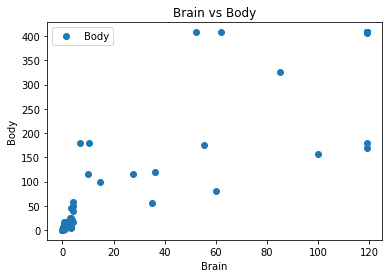

In [ ]:
import matplotlib.pyplot as plt
df.plot(x ='Brain', y='Body',style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [ ]:
df.groupby("Brain")["Body"].mean()

Brain
0.005        0.14
0.010        0.25
0.023        0.35
0.048        0.33
0.060        1.00
0.075        1.20
0.101        4.00
0.104        2.50
0.120        1.00
0.122        3.00
0.200        5.00
0.280        1.90
0.425        6.40
0.480       15.50
0.550        2.40
0.750       12.30
0.785        3.50
0.900        2.60
0.920        5.70
1.000        6.60
1.040        5.50
1.350        8.10
1.400       12.50
1.410       17.50
1.620       11.40
1.700        6.30
2.000       12.30
2.500       12.10
3.000       25.00
3.300       25.60
3.385       44.50
3.500        7.35
3.600       21.00
4.050       17.00
4.190       58.00
4.235       50.40
4.288       39.20
6.800      179.00
10.000     115.00
10.550     179.50
14.830      98.20
27.660     115.00
35.000      56.00
36.330     119.50
52.160     408.00
55.500     175.00
60.000      81.00
62.000     408.00
85.000     325.00
100.000    157.00
119.000    361.10
Name: Body, dtype: float64

In [ ]:
x = df[['Brain']].values
y = df['Body'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size = 0.3)

In [ ]:
x_test,

(array([[4.288e+00],
        [4.050e+00],
        [1.000e+01],
        [1.350e+00],
        [3.600e+00],
        [1.000e+02],
        [1.040e+00],
        [1.040e-01],
        [7.850e-01],
        [2.500e+00],
        [6.000e-02],
        [3.300e+00],
        [1.190e+02],
        [2.000e-01],
        [1.190e+02],
        [8.500e+01],
        [1.190e+02],
        [9.000e-01],
        [1.190e+02],
        [2.000e+00],
        [7.500e-01],
        [4.250e-01],
        [2.300e-02],
        [1.190e+02],
        [4.235e+00],
        [1.055e+01],
        [3.000e+00],
        [5.216e+01],
        [1.190e+02],
        [5.550e+01],
        [1.483e+01],
        [1.010e-01],
        [9.200e-01],
        [6.200e+01],
        [1.410e+00],
        [1.400e+00],
        [4.190e+00],
        [7.500e-02],
        [3.500e+00],
        [5.500e-01],
        [5.000e-03],
        [3.500e+01],
        [3.633e+01]]),)

In [ ]:
x_train

array([[1.190e+02],
       [2.766e+01],
       [1.190e+02],
       [1.620e+00],
       [4.800e-02],
       [1.190e+02],
       [2.300e-02],
       [3.385e+00],
       [6.800e+00],
       [2.800e-01],
       [1.220e-01],
       [1.190e+02],
       [3.500e+00],
       [1.700e+00],
       [6.000e+01],
       [1.000e-02],
       [1.000e+00],
       [4.800e-01],
       [1.200e-01]])

In [ ]:
y_train

array([4.08e+02, 1.15e+02, 4.08e+02, 1.14e+01, 3.30e-01, 4.08e+02,
       4.00e-01, 4.45e+01, 1.79e+02, 1.90e+00, 3.00e+00, 4.08e+02,
       1.08e+01, 6.30e+00, 8.10e+01, 2.50e-01, 6.60e+00, 1.55e+01,
       1.00e+00])

In [ ]:
y_test

array([3.920e+01, 1.700e+01, 1.150e+02, 8.100e+00, 2.100e+01, 1.570e+02,
       5.500e+00, 2.500e+00, 3.500e+00, 1.210e+01, 1.000e+00, 2.560e+01,
       4.080e+02, 5.000e+00, 1.690e+02, 3.250e+02, 4.080e+02, 2.600e+00,
       1.800e+02, 1.230e+01, 1.230e+01, 6.400e+00, 3.000e-01, 4.060e+02,
       5.040e+01, 1.795e+02, 2.500e+01, 4.080e+02, 4.080e+02, 1.750e+02,
       9.820e+01, 4.000e+00, 5.700e+00, 4.080e+02, 1.750e+01, 1.250e+01,
       5.800e+01, 1.200e+00, 3.900e+00, 2.400e+00, 1.400e-01, 5.600e+01,
       1.195e+02])

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [7]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [8]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [10]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [11]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [12]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [13]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000
